<a href="https://colab.research.google.com/github/Padmashree02/Deforestation-Analysis_HSV---Computer-Vision/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imported required libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Image
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['image.cmap'] = 'gray'

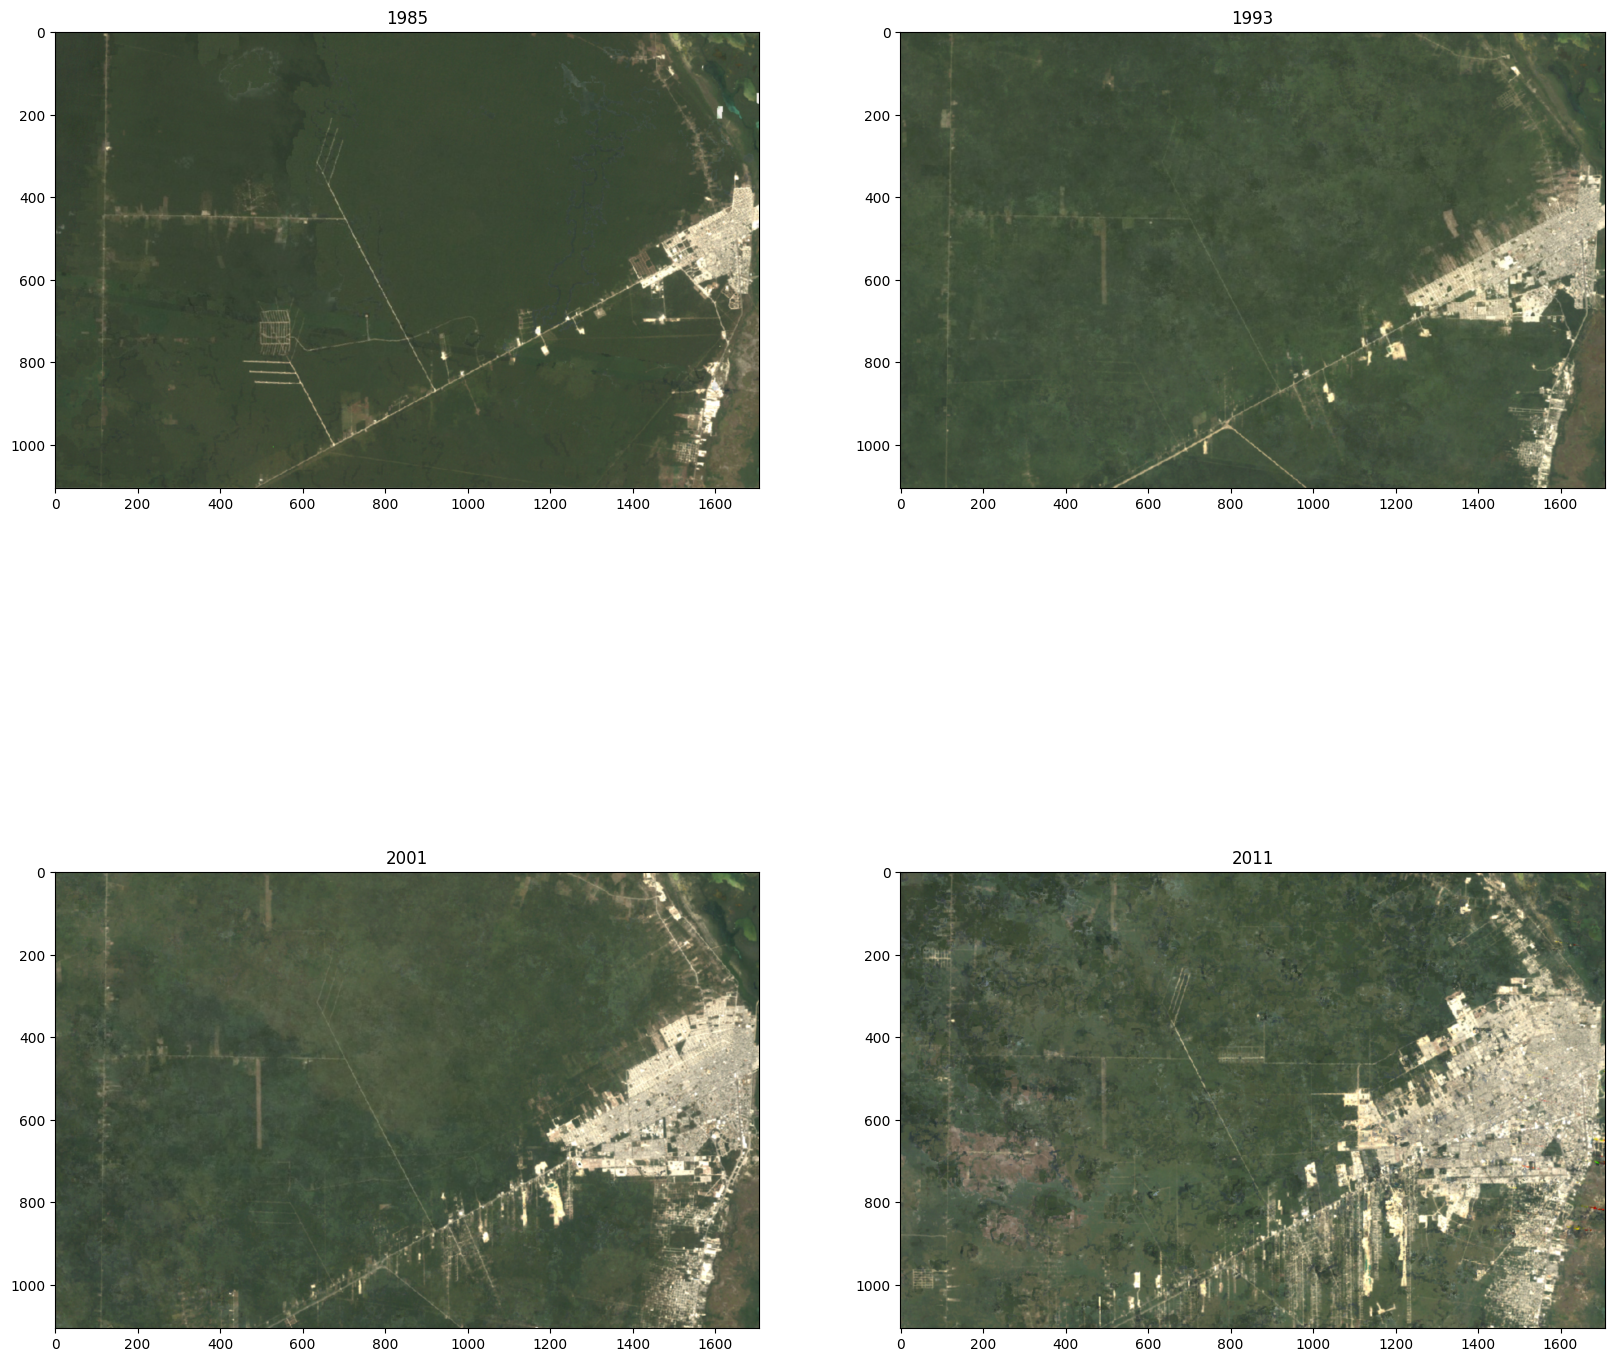

In [ ]:
#Read the image as an input data
f1985=cv2.imread('/content/1985.png')
f1993=cv2.imread('/content/1993.png')
f2001=cv2.imread('/content/2001.png')
f2011=cv2.imread('/content/2011.png')

#Display of the input images
plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(f1985[:,:,::-1]);plt.title('1985')
plt.subplot(222);plt.imshow(f1993[:,:,::-1]);plt.title('1993')
plt.subplot(223);plt.imshow(f2001[:,:,::-1]);plt.title('2001')
plt.subplot(224);plt.imshow(f2011[:,:,::-1]);plt.title('2011');

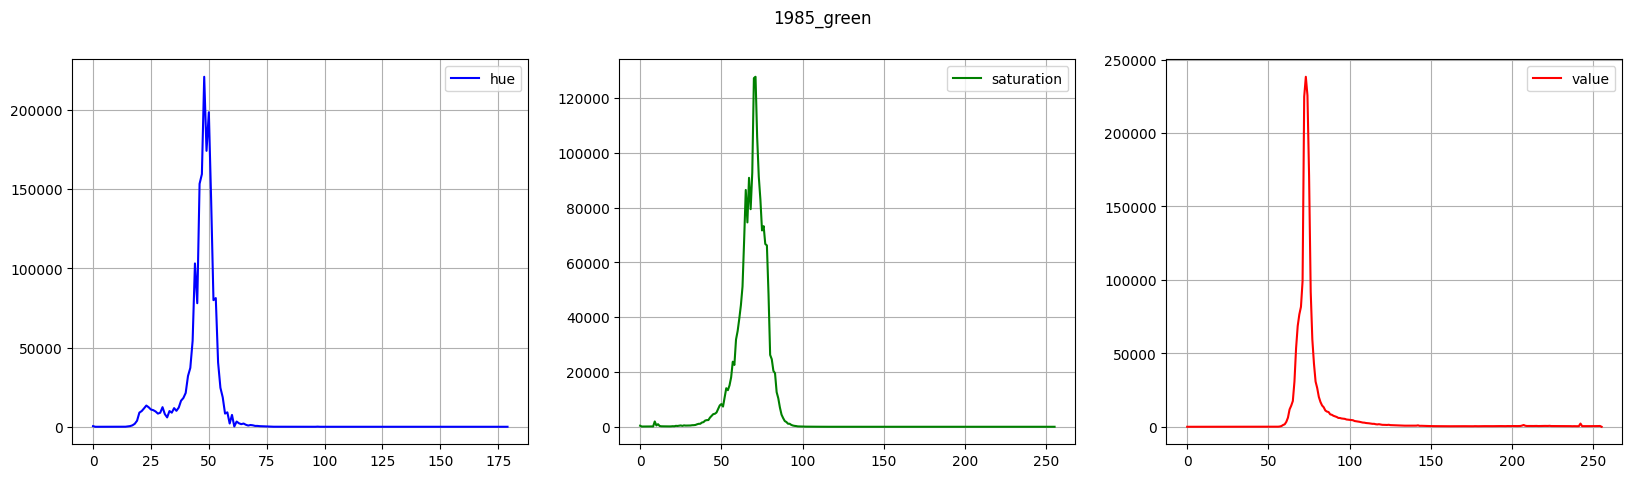

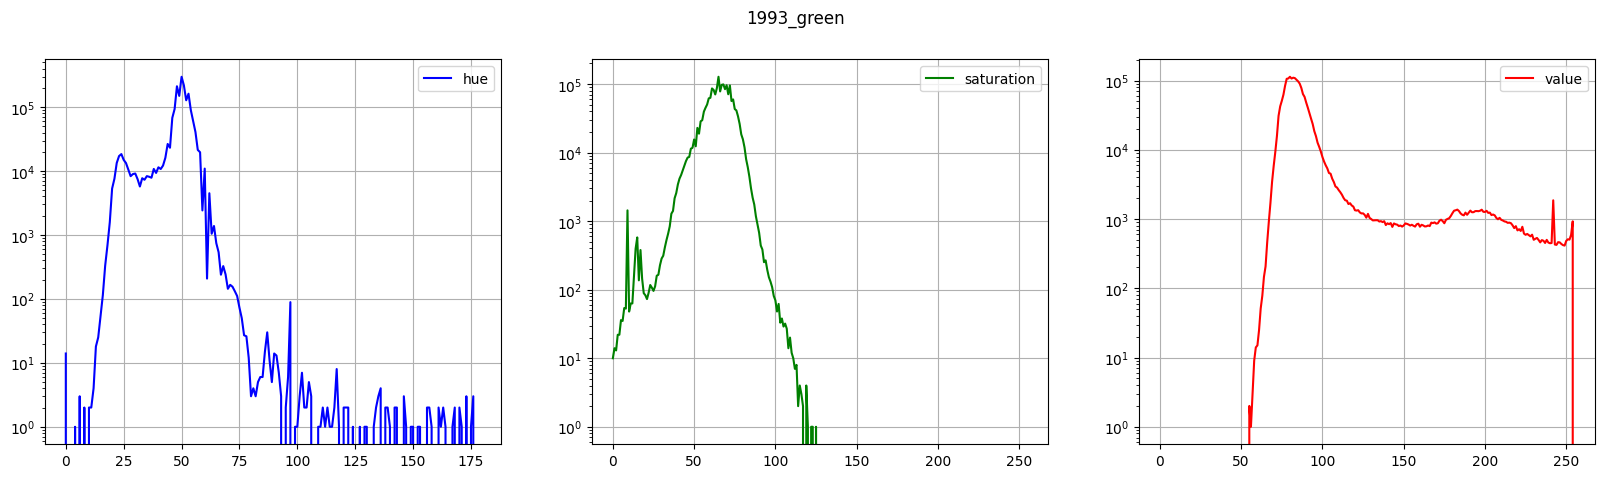

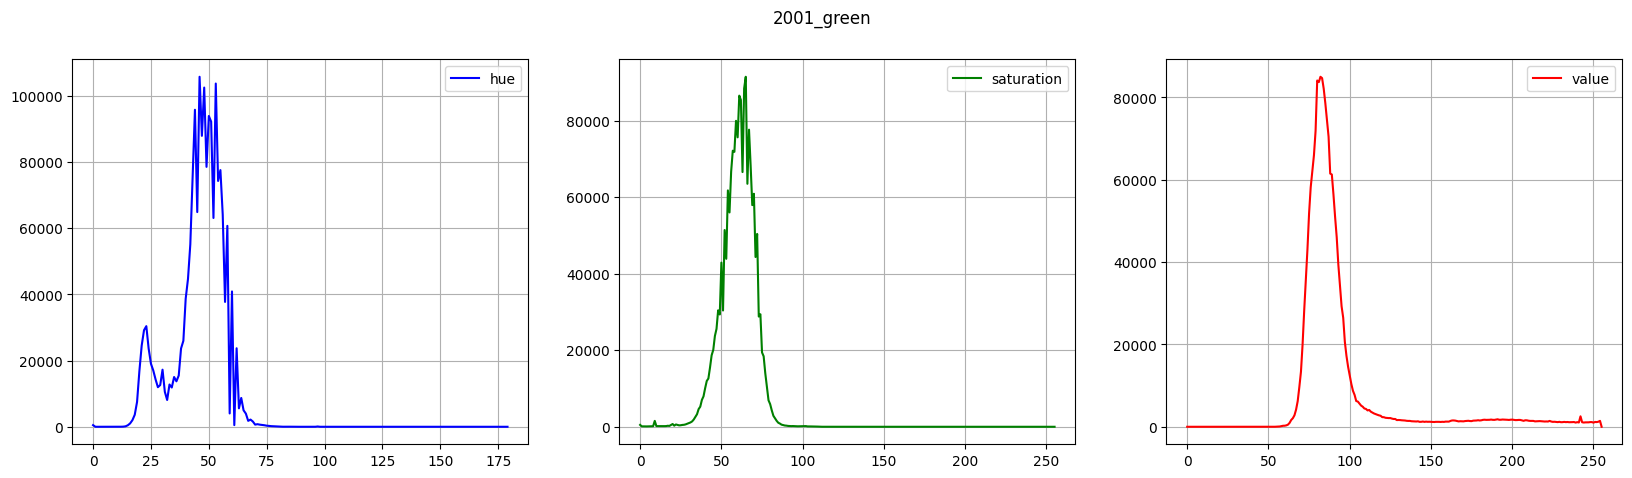

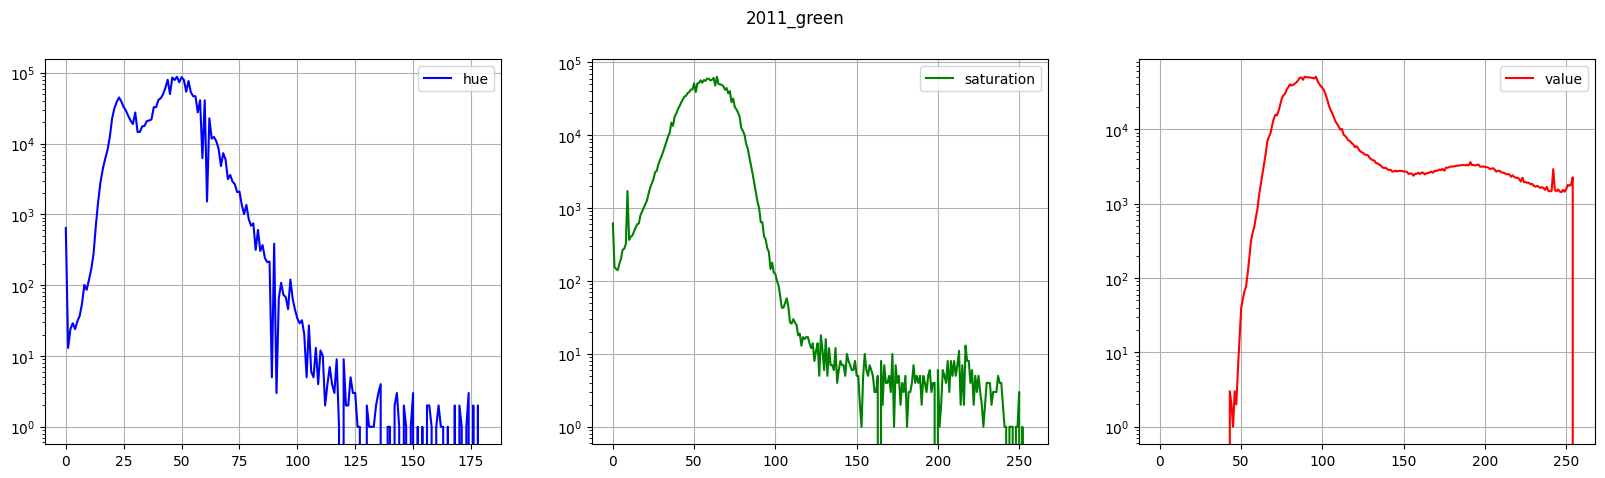

In [ ]:
#Pre-processing step

#Convert the origional image - BGR into HSV
f1985_hsv=cv2.cvtColor(f1985,cv2.COLOR_BGR2HSV)
f1993_hsv=cv2.cvtColor(f1993,cv2.COLOR_BGR2HSV)
f2001_hsv=cv2.cvtColor(f2001,cv2.COLOR_BGR2HSV)
f2011_hsv=cv2.cvtColor(f2011,cv2.COLOR_BGR2HSV)

#Ploting log and linear histogram
def draw_hist(image,title=" ",yscale=" "):
  histh=cv2.calcHist([image],[0],None,[180],[0,179])  #observe above code output
  hists=cv2.calcHist([image],[1],None,[256],[0,255])
  histv=cv2.calcHist([image],[2],None,[256],[0,255])

  #Linear histogram
  fig=plt.figure(figsize=[20,5])
  fig.suptitle(title)

  ax=fig.add_subplot(1,3,1)
  ax.set_yscale(yscale)
  plt.plot(histh,'b',label='hue')
  ax.grid()
  ax.legend()

  ax=fig.add_subplot(1,3,2)
  ax.set_yscale(yscale)
  plt.plot(hists,'g',label='saturation')
  ax.grid()
  ax.legend()

  ax=fig.add_subplot(1,3,3)
  ax.set_yscale(yscale)
  plt.plot(histv,'r',label='value')
  ax.grid()
  ax.legend()

#calling the function
draw_hist(f1985_hsv,'1985_green','linear')
draw_hist(f1993_hsv,'1993_green','log')
draw_hist(f2001_hsv,'2001_green','linear')
draw_hist(f2011_hsv,'2011_green','log')

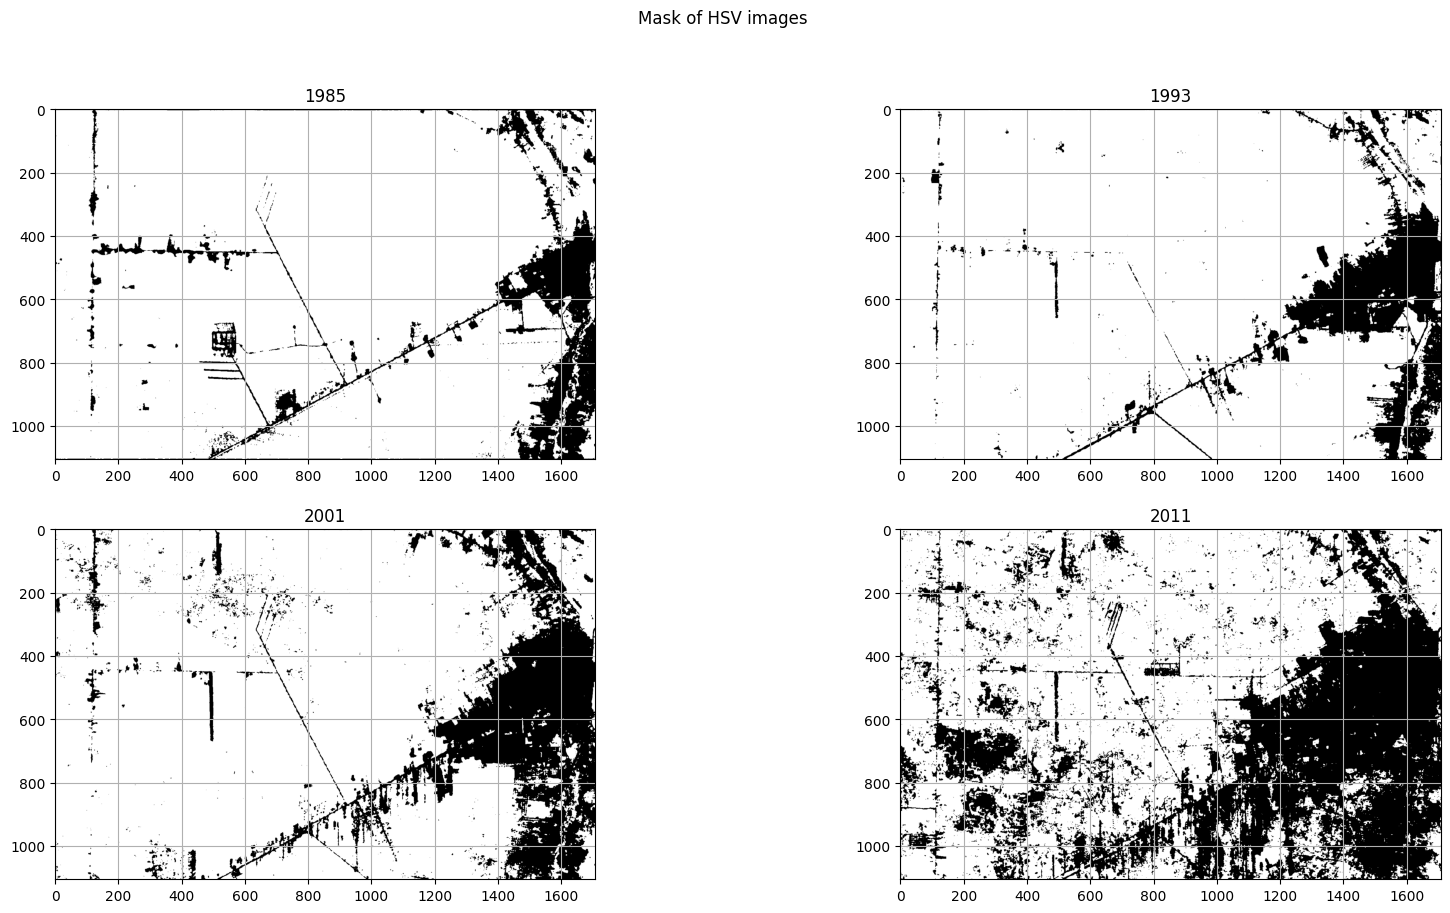

In [ ]:
#form the image segmentation of the image under HSV color space

#lower and upper values are computed using the histogram's highest peak
l=np.array([36,0,50],dtype='uint8')
u=np.array([80,255,100],dtype='uint8')

#Inrange to form the mask for color images
mask=cv2.inRange(f1985_hsv,l,u)
mask1=cv2.inRange(f1993_hsv,l,u)
mask2=cv2.inRange(f2001_hsv,l,u)
mask3=cv2.inRange(f2011_hsv,l,u)

#Display of the result of Inrange method
fig=plt.figure(figsize=[20,10])
fig.suptitle('Mask of HSV images')

ax=fig.add_subplot(2,2,1)
plt.imshow(mask)
plt.title('1985')
ax.grid()

ax=fig.add_subplot(2,2,2)
plt.imshow(mask1)
plt.title('1993')
ax.grid()

ax=fig.add_subplot(2,2,3)
plt.imshow(mask2)
plt.title('2001')
ax.grid()

ax=fig.add_subplot(2,2,4)
plt.imshow(mask3)
plt.title('2011')
ax.grid();

In [ ]:
#Post-processing step

#Calculate the green area from the images of the year 1985, 1993, 2001, 2011

non_pixel=cv2.countNonZero(mask)
tot=mask.shape[0]*mask.shape[1]
print("In 1985 = ",round(non_pixel/tot,2)*100)

non_pixel1=cv2.countNonZero(mask1)
tot1=mask1.shape[0]*mask1.shape[1]
print("In 1983 = ",round((non_pixel1/tot1)*100,2))

non_pixel2=cv2.countNonZero(mask2)
tot2=mask2.shape[0]*mask2.shape[1]
print("In 2001 = ",round((non_pixel2/tot2)*100,2))

non_pixel3=cv2.countNonZero(mask3)
tot3=mask3.shape[0]*mask3.shape[1]
print("In 2011 = ",round((non_pixel3/tot3)*100,2))

In 1985 =  90.0
In 1983 =  88.9
In 2001 =  82.24
In 2011 =  63.93


**Comparing HSV result with RGB result**

In 1985 :-  HSV -  90.0 || RGB - 93.43

In 1983 :-  HSV -  88.9 || RGB - 90.4

In 2001 :-  HSV -  82.24 || RGB - 84.63

In 2011 :-  HSV -  63.93 || RGB - 65.78

